In [1]:
from pandas import read_csv

transactions = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [2]:
transactions

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,...,D330,D331,D332,D333,D334,D335,D336,D337,D338,D339
0,0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501954,501954,3488954,0,13151575,29.00,W,7919,194.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501955,501955,3488955,0,13151580,312.95,W,7919,194.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501956,501956,3488956,0,13151717,774.00,W,7919,194.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501957,501957,3488957,0,13151720,226.00,W,7919,194.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Particionar dataframe

In [3]:
data_set_train = transactions.drop(range(501959 * 70 // 100, 501959))
data_set_validation = transactions.drop(range(501959 * 70 // 100)).reset_index().drop('index', axis=1)
target_train = data_set_train.target
target_validation = data_set_validation.target

Aislar columnas innecesarias

In [4]:
data_set_train = data_set_train.drop(["Unnamed: 0", "target", "Id"], axis=1)
data_set_validation= data_set_validation.drop(["Unnamed: 0", "target", "Id"], axis=1)

Chequeo de datos

In [6]:
data_set_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351371 entries, 0 to 351370
Columns: 392 entries, timestamp to D339
dtypes: float64(376), int64(2), object(14)
memory usage: 1.0+ GB


In [7]:
data_set_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150588 entries, 0 to 150587
Columns: 392 entries, timestamp to D339
dtypes: float64(376), int64(2), object(14)
memory usage: 450.4+ MB


In [8]:
data_set_train.select_dtypes("object")

,product_category,feat_card_4,feat_card_6,payer_email_domain,receiver_email_domain,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351366,W,visa,debit,yahoo.com,NaN,T,T,T,M0,T,F,F,F,T
351367,W,mastercard,debit,aol.com,NaN,T,T,T,M0,T,F,F,F,T
351368,W,mastercard,debit,gmail.com,NaN,T,T,T,M0,F,T,NaN,NaN,NaN
351369,C,mastercard,debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Encoding de las variables categoricas

In [9]:
variables_categoricas = ["product_category", "feat_card_4", "feat_card_6", "payer_email_domain", "receiver_email_domain", 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

In [10]:
cantidades_categoricas = {}

for variable in variables_categoricas:
    cantidades_categoricas[variable] = data_set_train[variable].nunique()

cantidades_categoricas

{'product_category': 5,
 'feat_card_4': 4,
 'feat_card_6': 4,
 'payer_email_domain': 59,
 'receiver_email_domain': 60,
 'C1': 2,
 'C2': 2,
 'C3': 2,
 'C4': 3,
 'C5': 2,
 'C6': 2,
 'C7': 2,
 'C8': 2,
 'C9': 2}

In [11]:
import category_encoders as ce

for variable in variables_categoricas:
    target_encoder = ce.TargetEncoder(cols=variable)
    data_set_train[variable] = target_encoder.fit_transform(data_set_train[variable], data_set_train.timestamp)
    data_set_validation[variable] = target_encoder.transform(data_set_validation[variable], data_set_validation.timestamp)

Normalizacion y Manejo de NaN

In [12]:
for variable in data_set_train.columns.to_list():
    promedio = data_set_train[variable].mean()
    desvio = data_set_train[variable].std()

    data_set_train[variable] = data_set_train[variable].fillna(promedio)
    
    if desvio != 0:
        data_set_train[variable] = data_set_train[variable].map(lambda x: (x - promedio) / desvio)
    else:
        data_set_train[variable] = data_set_train[variable].map(lambda x: x - promedio)

    promedio = data_set_validation[variable].mean()
    desvio = data_set_validation[variable].std()
    
    data_set_validation[variable] = data_set_validation[variable].fillna(promedio)

    if desvio != 0:
        data_set_validation[variable] = data_set_validation[variable].map(lambda x: (x - promedio) / desvio)
    else:
        data_set_validation[variable] = data_set_validation[variable].map(lambda x: x - promedio)

In [13]:
data_set_train

,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,...,D330,D331,D332,D333,D334,D335,D336,D337,D338,D339
0,-1.572623,-0.276688,0.520869,0.829414,0.000000,-0.281267,-1.459665,-1.430880,-1.439709,0.237351,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-1.572623,-0.442603,0.520869,-1.448865,0.251167,-0.281267,0.444449,-2.417424,-1.439709,0.335357,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-1.572596,-0.316591,0.520869,-1.059736,0.794778,-0.281267,-0.102395,-0.838954,0.503389,0.384360,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-1.572584,-0.354395,0.520869,1.687210,1.281499,-0.281267,0.444449,-2.047470,0.503389,1.815245,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-1.572582,-0.354395,-2.613709,-1.093591,0.946483,-0.281267,0.444449,-2.417424,-1.439709,1.266412,...,-0.227002,-0.128719,-0.147956,-0.142022,-0.03438,-0.074869,-0.051309,-0.105766,-0.114689,-0.110556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351366,1.783480,-0.335493,0.520869,0.578357,0.794778,-0.281267,-0.102395,0.640862,0.503389,0.335357,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
351367,1.783502,-0.358595,0.520869,0.167814,0.946483,-0.281267,0.444449,0.591535,0.503389,0.080542,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
351368,1.783511,-0.072969,0.520869,1.467560,0.181636,-0.281267,0.444449,-2.047470,0.503389,0.384360,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
351369,1.783540,-0.348695,-0.077751,-1.367490,0.276452,2.799442,0.444449,0.591535,0.503389,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


Logistic Regression

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

In [15]:
modelo = LogisticRegression(penalty='l2', class_weight='balanced', solver='saga', warm_start=True, n_jobs=5)

In [16]:
modelo.fit(data_set_train, target_train)

c:\Users\palej\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', n_jobs=5, solver='saga',
                   warm_start=True)

In [17]:
target_train_predict = modelo.predict(data_set_validation)

In [18]:
target_validation = target_validation.astype(int)

In [19]:
matriz_confusion = confusion_matrix(target_validation, target_train_predict)
matriz_confusion

array([[117325,  27570],
       [  1619,   4074]])

<function matplotlib.pyplot.show(close=None, block=None)>

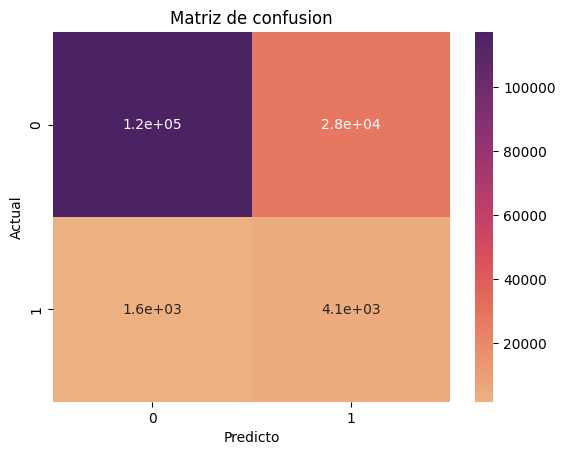

In [20]:
sns.heatmap(matriz_confusion, annot=True, cmap='flare')
plt.title("Matriz de confusion")
plt.xlabel('Predicto')
plt.ylabel('Actual')
plt.show

In [21]:
accuracy_score(target_validation, target_train_predict)

0.8061664940101468

In [22]:
especificidad = matriz_confusion[0][0] / sum(matriz_confusion[0])
especificidad

np.float64(0.8097242831015563)

In [23]:
sensibilidad = matriz_confusion[1][1] / sum(matriz_confusion[1])
sensibilidad

np.float64(0.7156156683646584)

In [24]:
target_train_predict = target_train_predict.astype(str)
target_validation = target_validation.astype(str)

In [25]:
target_probabilidad = modelo.predict_proba(data_set_validation)[:, 1]

In [26]:
roc_auc_score(target_validation, target_probabilidad)

np.float64(0.8415709293889122)

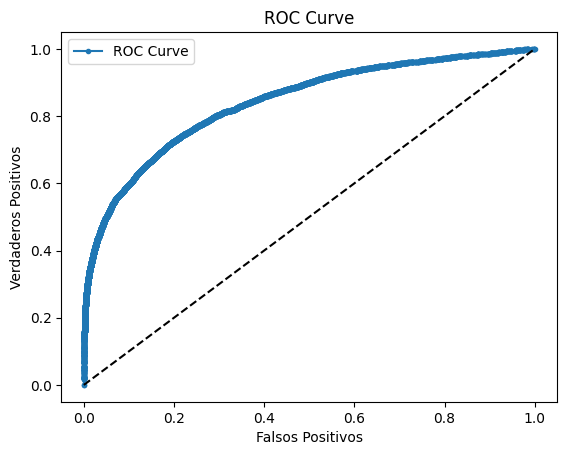

In [27]:
target_validation = target_validation.astype(int)

falsos_pos, verdaderos_pos, umbrales = roc_curve(target_validation, target_probabilidad)
roc_auc = auc(falsos_pos, verdaderos_pos)

plt.plot(falsos_pos, verdaderos_pos, marker='.', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()
plt.show()